# Dimension reduction and feature extraction

In [19]:
# libs
import numpy as np
import scipy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
np.random.seed(42)


### SVD for variables transformation

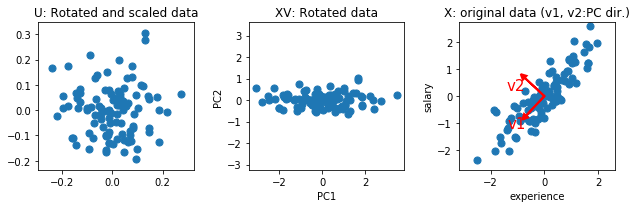

In [9]:

# dataset
n_samples = 100
experience = np.random.normal(size=n_samples)
salary = 1500 + experience + np.random.normal(size=n_samples, scale=.5)
X = np.column_stack([experience, salary])
# PCA using SVD
X -= X.mean(axis=0) # Centering is required
U, s, Vh = scipy.linalg.svd(X, full_matrices=False)
# U : Unitary matrix having left singular vectors as columns.
# Of shape (n_samples,n_samples) or (n_samples,n_comps), depending on
# full_matrices.
#
# s : The singular values, sorted in non-increasing order. Of shape (n_comps,),
# with n_comps = min(n_samples, n_features).
#
# Vh: Unitary matrix having right singular vectors as rows.
# Of shape (n_features, n_features) or (n_comps, n_features) depending
# on full_matrices.
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.scatter(U[:, 0], U[:, 1], s=50)
plt.axis('equal')
plt.title("U: Rotated and scaled data")
plt.subplot(132)
# Project data
PC = np.dot(X, Vh.T)
plt.scatter(PC[:, 0], PC[:, 1], s=50)
plt.axis('equal')
plt.title("XV: Rotated data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], s=50)
for i in range(Vh.shape[0]):
    plt.arrow(x=0, y=0, dx=Vh[i, 0], dy=Vh[i, 1], head_width=0.2,head_length=0.2, linewidth=2, fc='r', ec='r')

    plt.text(Vh[i, 0], Vh[i, 1],'v%i' % (i+1), color="r", fontsize=15, horizontalalignment='right', verticalalignment='top')
plt.axis('equal')
plt.ylim(-4, 4)
plt.title("X: original data (v1, v2:PC dir.)")
plt.xlabel("experience")
plt.ylabel("salary")
plt.tight_layout()

### Principal components analysis (PCA)

[0.96321956 0.03678044]


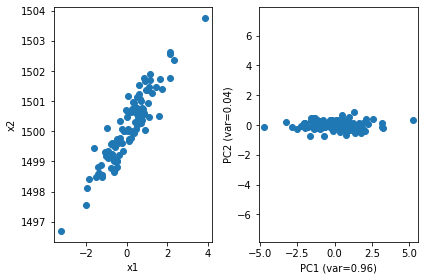

In [5]:
# dataset
n_samples = 100
experience = np.random.normal(size=n_samples)
salary = 1500 + experience + np.random.normal(size=n_samples, scale=.5)
X = np.column_stack([experience, salary])
# PCA with scikit-learn
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
PC = pca.transform(X)
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("x1"); plt.ylabel("x2")
plt.subplot(122)
plt.scatter(PC[:, 0], PC[:, 1])
plt.xlabel("PC1 (var=%.2f)" % pca.explained_variance_ratio_[0])
plt.ylabel("PC2 (var=%.2f)" % pca.explained_variance_ratio_[1])
plt.axis('equal')
plt.tight_layout()

## Multi-dimensional Scaling (MDS)
### Classical multidimensional scaling

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Pairwise distance between European cities
url = 'https://raw.github.com/neurospin/pystatsml/master/datasets/eurodist.csv'
df = pd.read_csv(url)
print(df.iloc[:5, :5])
city = df["city"]
D = np.array(df.iloc[:, 1:]) # Distance matrix
# Arbitrary choice of K=2 components
from sklearn.manifold import MDS
mds = MDS(dissimilarity='precomputed', n_components=2, random_state=40, max_iter=3000,eps=1e-9)
X = mds.fit_transform(D)

        city  Athens  Barcelona  Brussels  Calais
0     Athens       0       3313      2963    3175
1  Barcelona    3313          0      1318    1326
2   Brussels    2963       1318         0     204
3     Calais    3175       1326       204       0
4  Cherbourg    3339       1294       583     460


In [10]:
Deuclidean = metrics.pairwise.pairwise_distances(X, metric='euclidean')
print(np.round(Deuclidean[:5, :5]))

[[0. 1. 1. 2. 1.]
 [1. 0. 1. 2. 0.]
 [1. 1. 0. 1. 1.]
 [2. 2. 1. 0. 2.]
 [1. 0. 1. 2. 0.]]


(-3.160230547749059,
 3.0819949791139813,
 -1.7801692916137752,
 2.260338431752203)

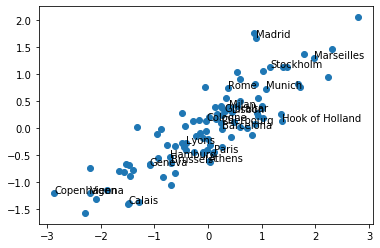

In [12]:
theta = 80 * np.pi / 180.
rot = np.array([[np.cos(theta), -np.sin(theta)],
[np.sin(theta), np.cos(theta)]])
Xr = np.dot(X, rot)
# flip x
Xr[:, 0] *= -1
plt.scatter(Xr[:, 0], Xr[:, 1])
for i in range(len(city)):
    plt.text(Xr[i, 0], Xr[i, 1], city[i])
plt.axis('equal')

### Determining the number of components

[48644495.28571428, 3356497.365752386, 2858455.495887962, 2756310.637628011]


Text(0, 0.5, 'stress')

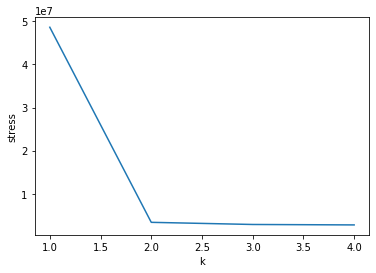

In [14]:
k_range = range(1, min(5, D.shape[0]-1))
stress = [MDS(dissimilarity='precomputed', n_components=k,
random_state=42, max_iter=300, eps=1e-9).fit(D).stress_ for k in k_range]
print(stress)
plt.plot(k_range, stress)
plt.xlabel("k")
plt.ylabel("stress")

### Exercice 
Describe the data set.
Should the dataset been standardized?

• Describe the structure of correlations among variables.

• Compute a PCA with the maximum number of components.

• Compute the cumulative explained variance ratio. Determine the number of components

𝐾 by your computed values.

• Print the 𝐾 principal components directions and correlations of the 𝐾 principal components with the original variables. Interpret the contribution of the original variables into
the PC.

• Plot the samples projected into the 𝐾 first PCs.

• Color samples by their species.